<a href="https://colab.research.google.com/github/Murdocksilva/Data-Science---Coder-House/blob/main/Pre-entrega1_Datascience1_Coderhouse_AlfonsoMarrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preentrega 1
#### Data Science I - Coderhouse




## Modelo para aprobación de créditos  bancarios



### Integrantes:
Alfonso Marrero Silva

### Origen del dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

## Dependencias:


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

# Adquisición de datos

In [3]:
url = 'https://raw.githubusercontent.com/Murdocksilva/Data-Science---Coder-House/main/loan_approval_dataset.csv'
df = pd.read_csv(url)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Descripción de variables



*   no_of_dependents = número de dependientes del solicitante. >=0
*   education = nivel educativo del solicitante [Graduate : graduado , Not Graduate : no graduado]
*   self_employed = trabajador por su propia cuenta [Yes : independiente , No : no independiente]
*   income_annum = ingreso anualizado. >0
*   loan_amount = monto del préstamo. >0
*   loan_term = meses plazo del préstamo. >0
*   cibil_score = puntaje de solvencia crediticia de los ultimos 6 meses. A mayor puntaje mayor solvencia del solicitante [300,900]
*   residential_assets_value = valor de los activos residenciales.
*   commercial_assets_value = valor de los activos comerciales.
*   luxury_assets_value = valor de los activos de lujo.
*   bank_asset_value = valor de los activos bancarios.
*   loan_status = estado del préstamo. variable target [Approved : aprobado , Rejected : rechazado]















#Preguntas o Hipótesis de interés sobre el dataset

1. ¿como se distribuye la relación de ingresos del solicitante vs el monto del préstamo solicitado?
2. cual es la correlación entre las variables numericas del modelo?
3. ¿como es la distribución entre el total de activos del solicitante y el monto del préstamo solicitado?
4. ¿como es la distribución entre la cantidad de dependientes del solicitante y el monto del préstamo solicitado?
5. ¿como se distribuye el nivel educativo de los solicitantes?
6. ¿cual es la distribución de los solicitantes por tipo de trabajo?



# Descriptiva

In [4]:
df.shape

(4269, 13)

El dataset obtenido de la base de datos posee 4269 filas y 13 columnas, de las cuales 12 (doce) son variables independientes a analizar y 1 (una) corresponde a la variable target o dependiente

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [7]:
df.duplicated().value_counts()

False    4269
Name: count, dtype: int64

El dataset no posee filas repetidas.

In [8]:
df.isna() .sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


El dataset no posee valores nulos, pero tiene un problema con el nombre de las columnas = hay un espacio en blanco antes de cada nombre.

In [21]:
df.describe(include = 'object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [22]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [27]:
df.columns = [col.strip() for col in df.columns]

for col in df.columns:
    print(f"'{col}': {type(col)}")

'loan_id': <class 'str'>
'no_of_dependents': <class 'str'>
'education': <class 'str'>
'self_employed': <class 'str'>
'income_annum': <class 'str'>
'loan_amount': <class 'str'>
'loan_term': <class 'str'>
'cibil_score': <class 'str'>
'residential_assets_value': <class 'str'>
'commercial_assets_value': <class 'str'>
'luxury_assets_value': <class 'str'>
'bank_asset_value': <class 'str'>
'loan_status': <class 'str'>


limpiamos correctamente. he eliminado el espacio en blanco antes del nombre de cada columna.

In [31]:
print(df.dtypes)

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


luego de corregir y limpiar los nombres en las columnas vuelvo a corroborar que el tipo de datos de cada columna siguen siendo del tipo correcto.

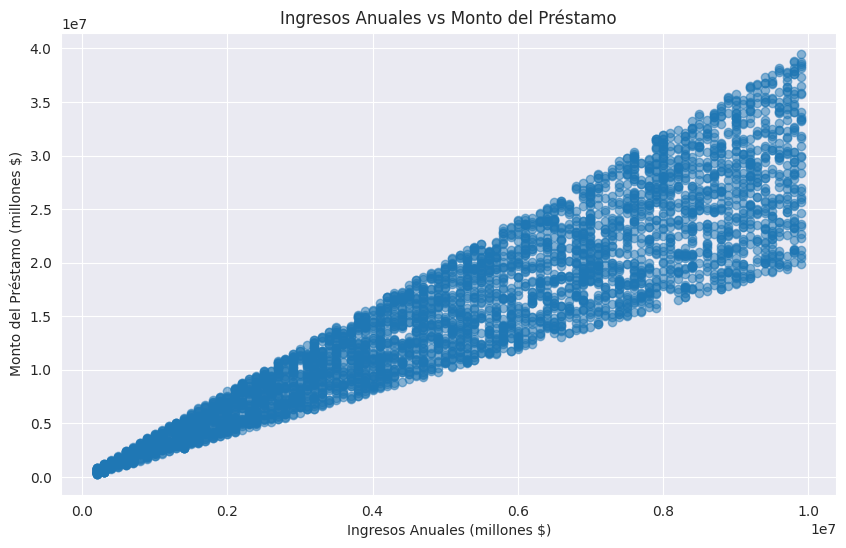

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['income_annum'], df['loan_amount'], alpha=0.5)
plt.title('Ingresos Anuales vs Monto del Préstamo')
plt.xlabel('Ingresos Anuales (millones $)')
plt.ylabel('Monto del Préstamo (millones $)')
plt.show()

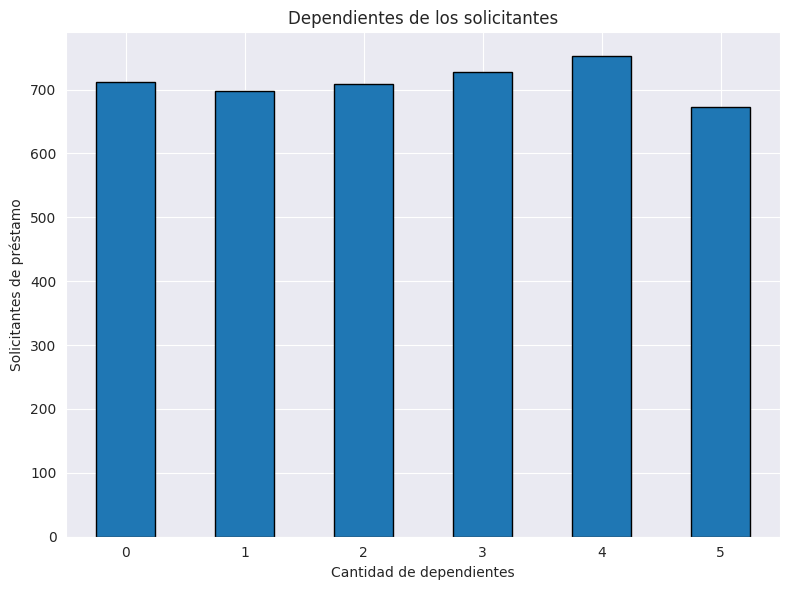

In [71]:
df['no_of_dependents'] = df['no_of_dependents'].astype('category')
ordered_dependents = df['no_of_dependents'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ordered_dependents.plot(kind='bar', edgecolor='black')
plt.title('Dependientes de los solicitantes')
plt.xlabel('Cantidad de dependientes')
plt.ylabel('Solicitantes de préstamo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

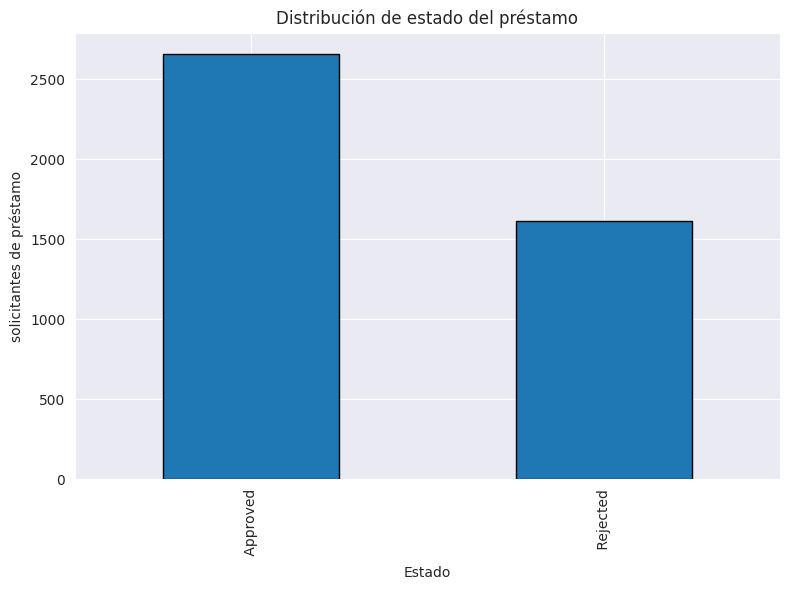

In [72]:
plt.figure(figsize=(8, 6))
df['loan_status'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribución de estado del préstamo')
plt.xlabel('Estado')
plt.ylabel('solicitantes de préstamo')
plt.tight_layout()
plt.show()

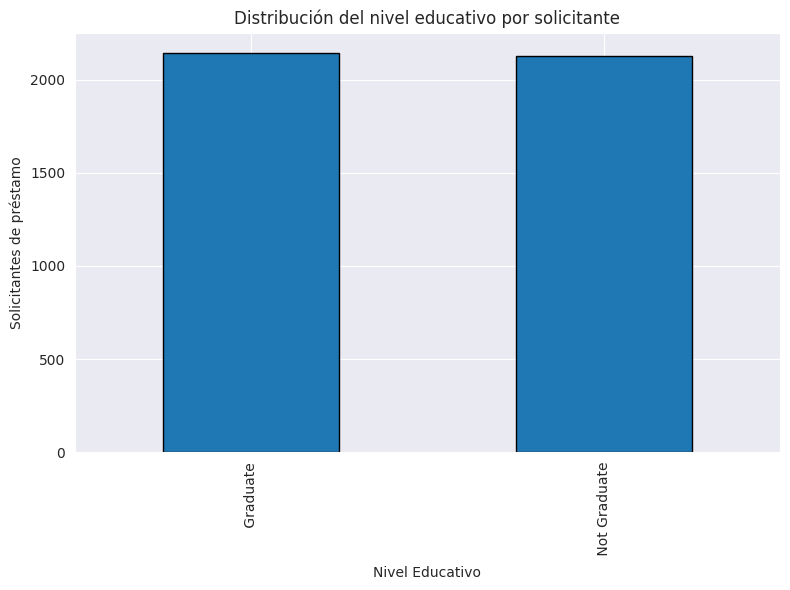

In [76]:
plt.figure(figsize=(8, 6))
df['education'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribución del nivel educativo por solicitante')
plt.xlabel('Nivel Educativo')
plt.ylabel('Solicitantes de préstamo')
plt.tight_layout()
plt.show()

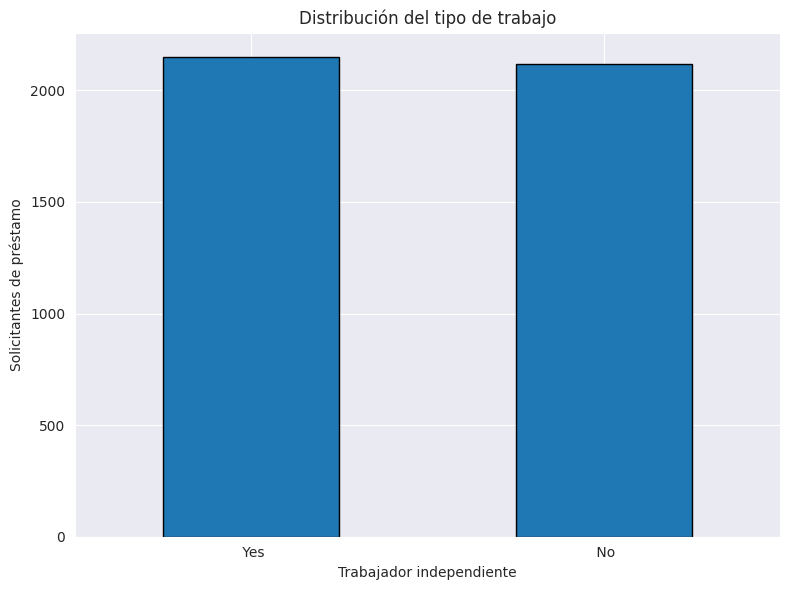

In [78]:
plt.figure(figsize=(8, 6))
df['self_employed'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribución del tipo de trabajo')
plt.xlabel('Trabajador independiente')
plt.ylabel('Solicitantes de préstamo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

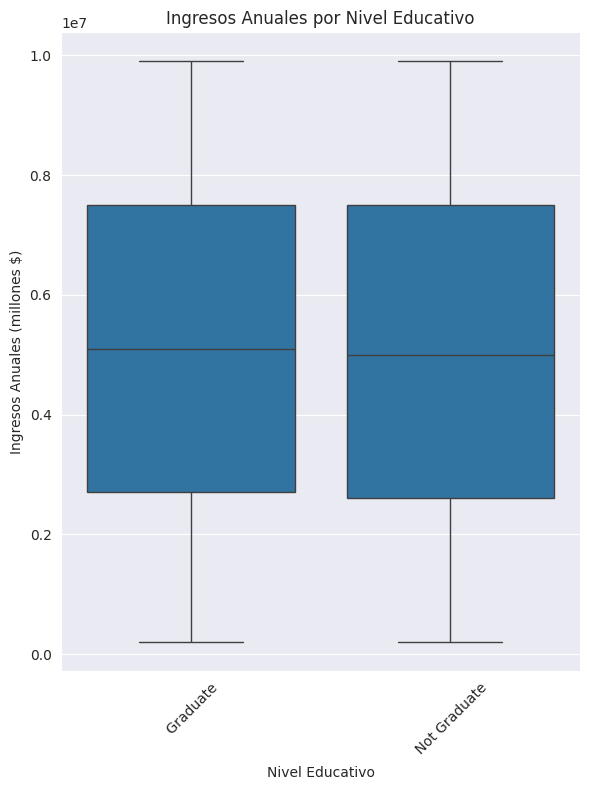

In [54]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='education', y='income_annum', data=df)
plt.title('Ingresos Anuales por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingresos Anuales (millones $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

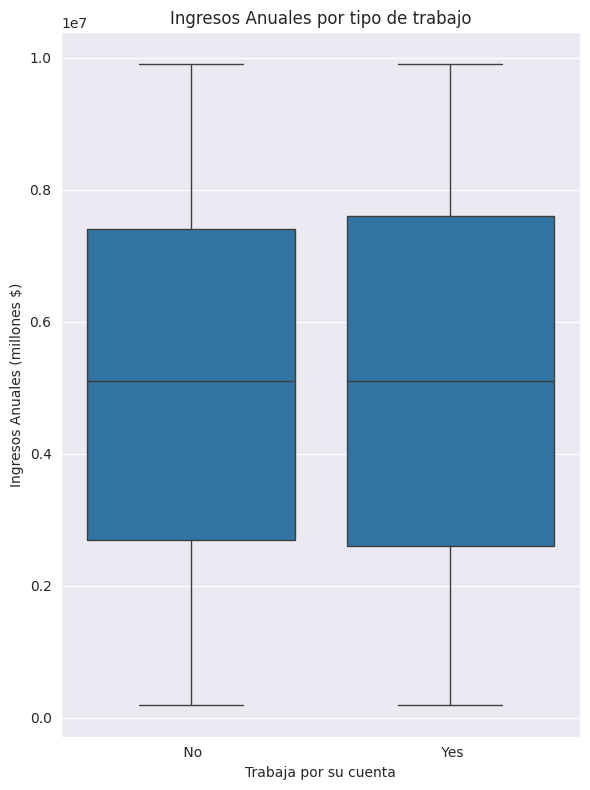

In [79]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='self_employed', y='income_annum', data=df)
plt.title('Ingresos Anuales por tipo de trabajo')
plt.xlabel('Trabaja por su cuenta')
plt.ylabel('Ingresos Anuales (millones $)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

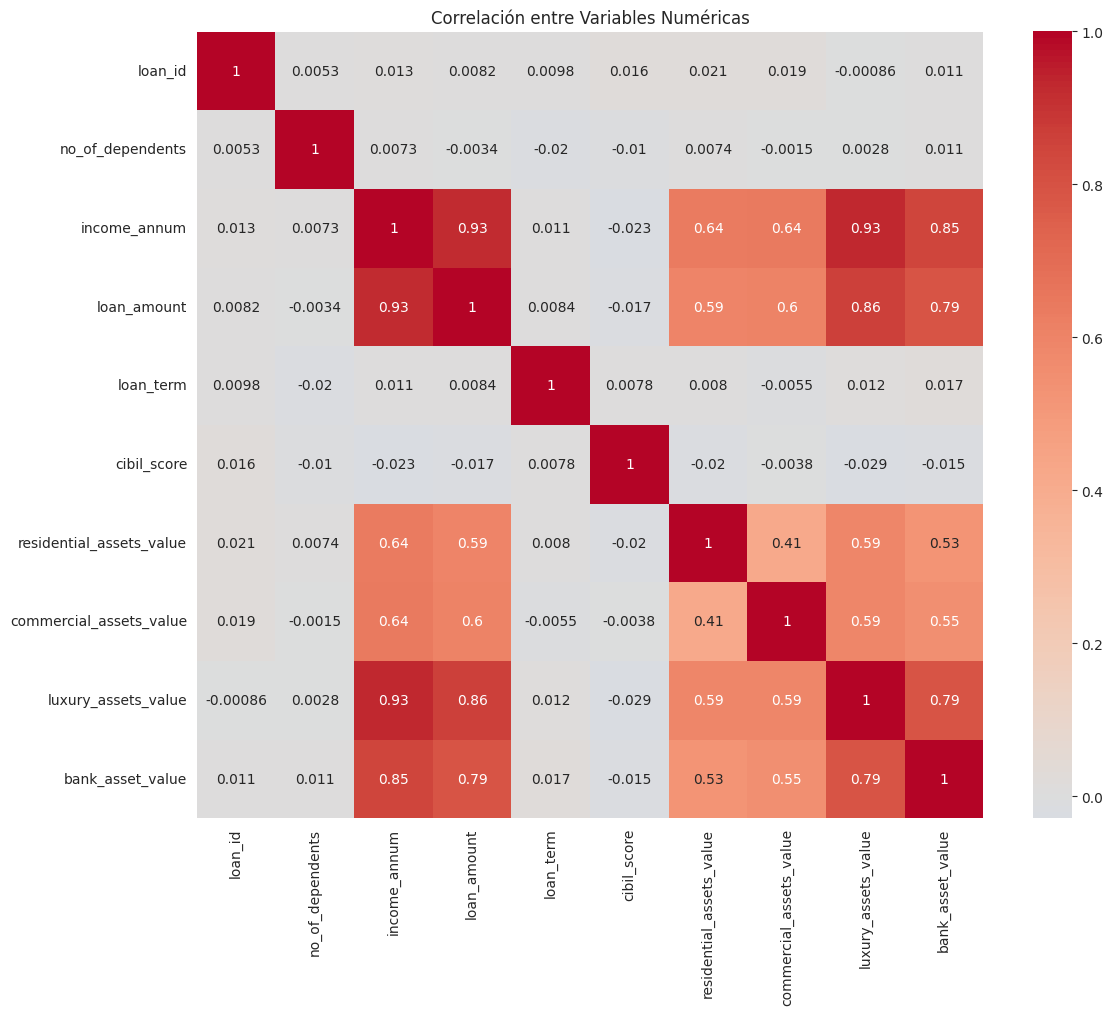

In [35]:
correlaciones = df.select_dtypes(include=['int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

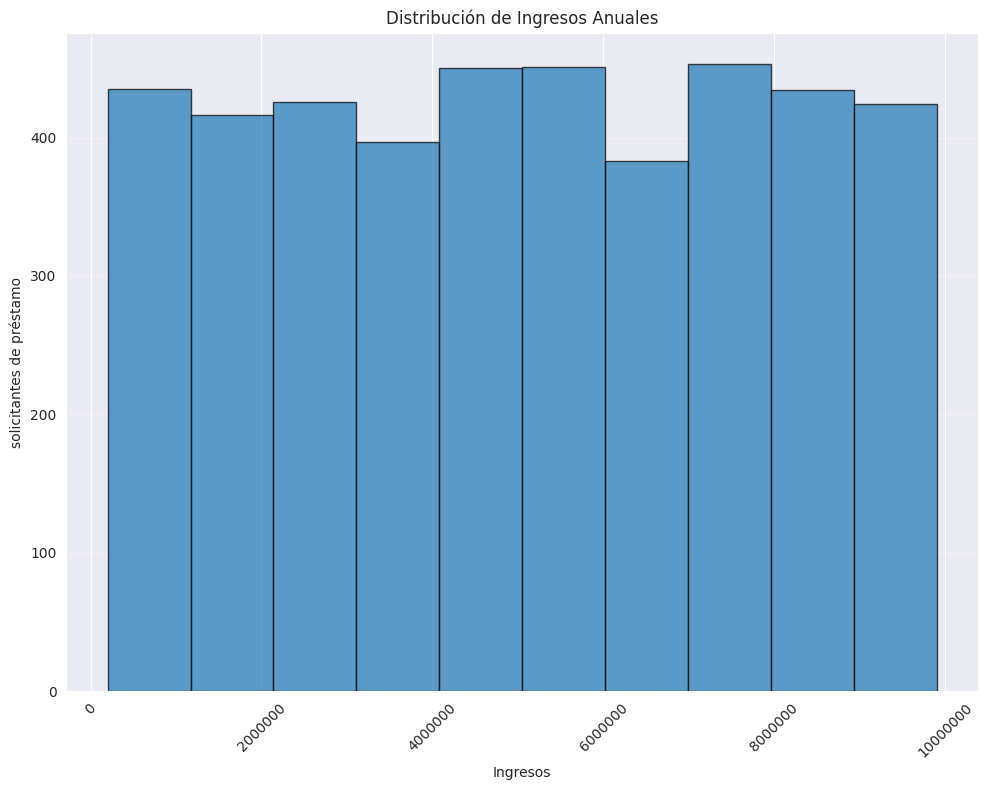

In [61]:
plt.figure(figsize=(10, 8))
plt.hist(df['income_annum'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribución de Ingresos Anuales')
plt.xlabel('Ingresos')
plt.ylabel('solicitantes de préstamo')
plt.grid(axis='y', alpha=0.3)

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

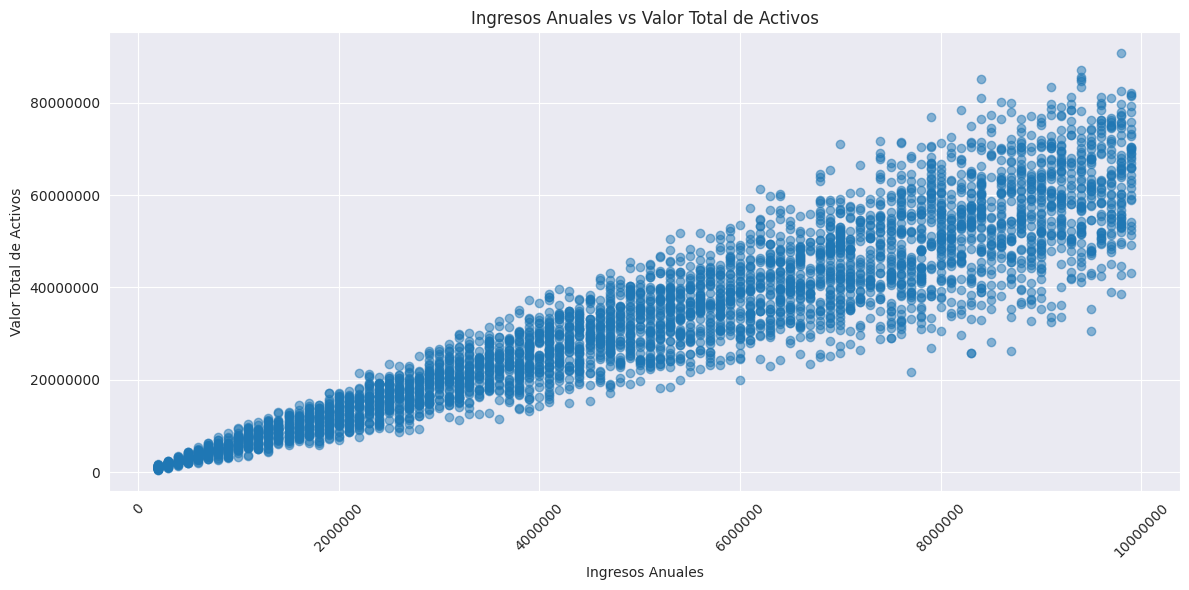

In [82]:
df['total_assets'] = (df['residential_assets_value'] +
                    df['commercial_assets_value'] +
                    df['luxury_assets_value'] +
                    df['bank_asset_value'])

plt.figure(figsize=(12, 6))
plt.scatter(df['income_annum'], df['total_assets'], alpha=0.5)
plt.title('Ingresos Anuales vs Valor Total de Activos')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Valor Total de Activos')

plt.ticklabel_format(style='plain', axis='both')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()